In [1]:
using JLD
using PyPlot
using PyCall
@pyimport numpy as np

激光参数

In [2]:
const c = 3e8
const I_si = 1e15
const λ=390.0e-9
const ω_si = 2π*c/λ
const E_si = 2.742e3*√I_si

const ω = ω_si * 2.4189e-17
const E0 = E_si/5.1421e11
const A0 = E0/ω
const T = 2π/ω

53.74343709950804

原子参数

In [3]:
const Ip1, Ip2 = -0.9, -2.0
const ne = 1000000
const s1, s2 = 1.0, 1.0
const vper = √(abs(E0)/ √(2.0*abs(Ip1)))

0.35452375440008055

# 第一个电子电离

载波包络

In [4]:
const N_cycle = 8
const N1, N2, N3 = 2, 4, 2

(2,4,2)

In [5]:
@inline function GetEleField(t::Float64)
    envelope = t < N1*T ? sin(0.5π*t/N1/T)^2 : 
                t < (N1+N2)*T ? 1:
                t < (N1+N2+N3)*T ? cos(0.5π*(t-(N1-N2)*T)/N3/T)^2 : 0
    envelope*cos(ω*t)*E0
end

GetEleField (generic function with 1 method)

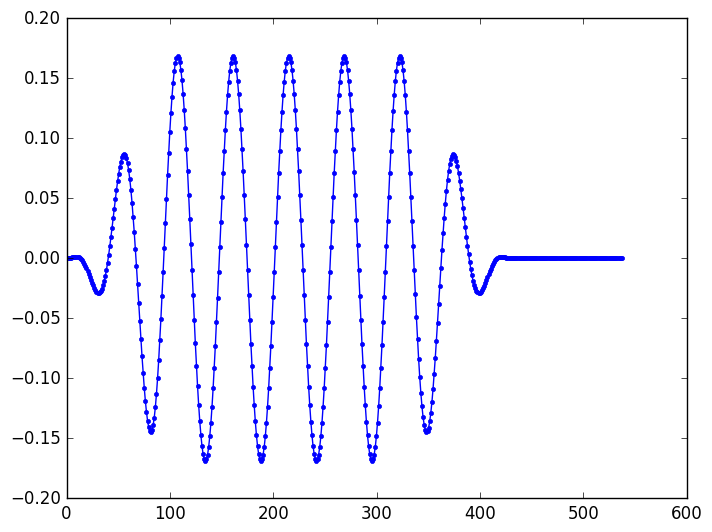

 0.175965 seconds (66.21 k allocations: 2.820 MB)


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000026C833C8>

In [6]:
t = linspace(1, 10T, 500)
@time ele = map(GetEleField, t)
plot(t, ele, ".-")

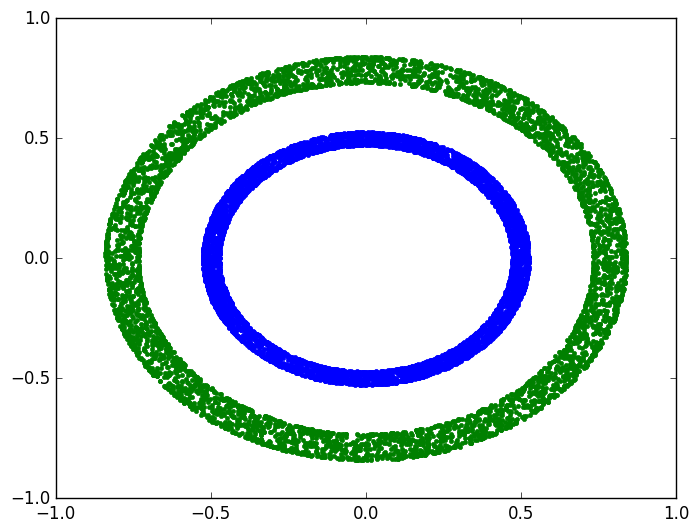

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000055D33438>

In [59]:
x = load("data/init2.jld")["x"]
y = load("data/init2.jld")["y"]
px = load("data/init2.jld")["px"]
py = load("data/init2.jld")["py"];

plot(x, y, ".")
plot(px, py, ".")